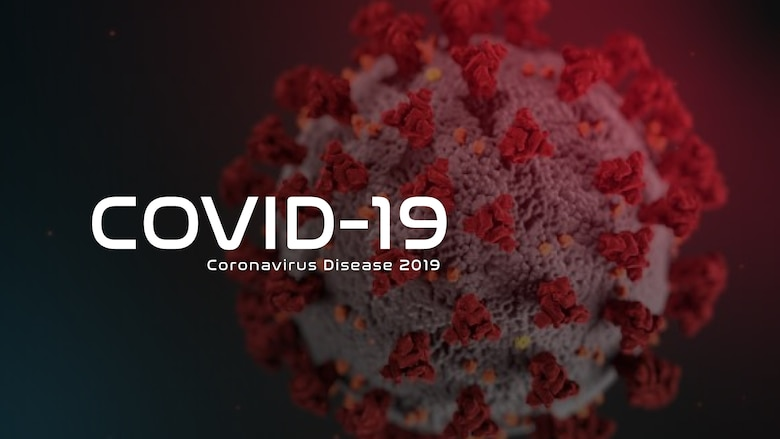

In [22]:
# display image

import IPython
url = 'https://media.defense.gov/2020/Mar/09/2002265012/780/780/0/200309-D-HN545-003.JPG'
IPython.display.Image(url, width = 900)

In [23]:
#Import libraries

import numpy as np 
import pandas as pd

In [118]:
import os

In [27]:
# Loading the cumulative raw data

raw_data_confirmed = pd.read_csv('/Users/siboerma/Desktop/Learning/COVID-19 Project/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_data_deaths = pd.read_csv('/Users/siboerma/Desktop/Learning/COVID-19 Project/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_data_Recovered = pd.read_csv('/Users/siboerma/Desktop/Learning/COVID-19 Project/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [28]:
# Review data shape
print("The Shape of Cornirmed is: ", raw_data_confirmed.shape)
print("The Shape of Deaths is: ", raw_data_deaths.shape)
print("The Shape of Recovered is: ", raw_data_Recovered.shape)

The Shape of Cornirmed is:  (269, 310)
The Shape of Deaths is:  (269, 310)
The Shape of Recovered is:  (256, 310)


In [29]:
# Preview 

raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493


In [33]:
raw_data_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/13/20', '11/14/20', '11/15/20', '11/16/20', '11/17/20', '11/18/20',
       '11/19/20', '11/20/20', '11/21/20', '11/22/20'],
      dtype='object', length=310)

In [30]:
raw_data_Recovered[raw_data_Recovered['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
43,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,985,985,985,985,985,985,985,985,985,985
44,Beijing,China,40.1824,116.4142,0,0,1,2,2,2,...,932,932,932,933,933,935,936,936,936,936
45,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,582,582,582,583,583,583,583,583,583,583
46,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,423,426,426,430,431,431,433,434,434,434
47,Gansu,China,35.7518,104.2861,0,0,0,0,0,0,...,177,177,177,177,177,177,177,178,178,178
48,Guangdong,China,23.3417,113.4244,0,2,2,2,2,4,...,1922,1922,1923,1925,1930,1933,1933,1935,1937,1939
49,Guangxi,China,23.8298,108.7881,0,0,0,0,0,0,...,258,258,258,258,258,258,258,258,258,258
50,Guizhou,China,26.8154,106.8748,0,0,0,0,0,0,...,145,145,145,145,145,145,145,145,145,145
51,Hainan,China,19.1959,109.7453,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
52,Hebei,China,37.8957,114.9042,0,0,0,0,0,0,...,362,362,362,363,363,363,363,363,363,365


In [35]:
# Unpivot a Dates and cases from wide to long format

raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_Recovered2 = pd.melt(raw_data_Recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)


raw_data_confirmed2.head()

The Shape of Cornirmed is:  (82314, 6)
The Shape of Cornirmed is:  (82314, 6)
The Shape of Cornirmed is:  (78336, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [37]:
raw_data_confirmed2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82314 entries, 0 to 82313
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  24786 non-null  object 
 1   Country/Region  82314 non-null  object 
 2   Lat             82314 non-null  float64
 3   Long            82314 non-null  float64
 4   Date            82314 non-null  object 
 5   value           82314 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.8+ MB


In [38]:
# Converting the new column to datatype date

raw_data_confirmed2['Date'] = pd.to_datetime(raw_data_confirmed2['Date'])
raw_data_deaths2['Date'] = pd.to_datetime(raw_data_deaths2['Date'])
raw_data_Recovered2['Date'] = pd.to_datetime(raw_data_Recovered2['Date'])

In [39]:
raw_data_confirmed2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82314 entries, 0 to 82313
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  24786 non-null  object        
 1   Country/Region  82314 non-null  object        
 2   Lat             82314 non-null  float64       
 3   Long            82314 non-null  float64       
 4   Date            82314 non-null  datetime64[ns]
 5   value           82314 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.8+ MB


In [40]:
# Replacing column name value to confirmed/deaths/recovered in each dataframe
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace('value', 'Confirmed')
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace('value', 'Deaths')
raw_data_Recovered2.columns = raw_data_Recovered2.columns.str.replace('value', 'Recovered')

In [43]:
# Investigating any NULL values
raw_data_deaths2.isnull().sum()

Province/State    57528
Country/Region        0
Lat                   0
Long                  0
Date                  0
Deaths                0
dtype: int64

In [47]:
# Dealing with NULL values in the Province/State column

raw_data_confirmed2['Province/State'].fillna(raw_data_confirmed2['Country/Region'], inplace=True)
raw_data_deaths2['Province/State'].fillna(raw_data_deaths2['Country/Region'], inplace=True)
raw_data_Recovered2['Province/State'].fillna(raw_data_Recovered2['Country/Region'], inplace=True)

raw_data_confirmed2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

In [50]:
# printing shapes 
print("The Shape of Confirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Deaths is: ", raw_data_deaths2.shape)
print("The Shape of Recovered is: ", raw_data_Recovered2.shape)

The Shape of Confirmed is:  (82314, 6)
The Shape of Deaths is:  (82314, 6)
The Shape of Recovered is:  (78336, 6)


In [57]:
# Join Corfirmed+Deaths+Recovered into one df.
# Step 1 - Join Confirmed w. Deaths

join_confirmed_with_deaths = raw_data_confirmed2.merge(raw_data_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of join_confirmed_with_deaths: ", join_confirmed_with_deaths.shape)

Shape of join_confirmed_with_deaths:  (82314, 7)


In [59]:
# Step 2 - full join with Recovered
full_join = join_confirmed_with_deaths.merge(raw_data_Recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)


Shape of second join:  (82314, 8)


In [60]:
# checking for null values (especially long and lat)
full_join.isnull().sum()

Province/State       0
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered         4284
dtype: int64

In [61]:
# Adding Month and Year as a new Column
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')
full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020


# Calculate daily confirmed/deaths/recovered cases

In [109]:
#creating a new df    
Date_minus_1 = full_join.copy()

Date_minus_1.head()



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020


In [110]:
#creating a new date column named 'Date for Matching'. This column is for matching purpose only.
#e.g. current 'Date' column is Jan 22, then 'Date for Matching' is Jan 23, but the corresponding case number is for Jan 22.

Date_minus_1['Date for Matching'] = Date_minus_1['Date'] + pd.Timedelta(days=1)

Date_minus_1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Date for Matching
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020,2020-01-23


In [111]:
# Renaming columns for matching.
Date_minus_1.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'True Date'}, inplace=True)

Date_minus_1.head()

,Province/State,Country/Region,Lat,Long,True Date,Confirmed - 1,Deaths - 1,Recovered - 1,Month-Year,Date for Matching
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020,2020-01-23
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020,2020-01-23


In [112]:
#Joing on the 2 DFs
full_join3 = full_join.merge(Date_minus_1 [['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date for Matching', 'True Date']], 
                            how = 'outer',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date for Matching'])

full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date for Matching,True Date
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT
1,Albania,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT


In [113]:
# Adding a column for daily confirmed/death/recovered cases
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date for Matching,True Date,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [114]:
# deleting columns added for matching purpose.
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date for Matching']
del full_join3['True Date']

In [116]:
# Additing manually the numbers for first day

full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,Jan-2020,0.0,0.0,0.0
1,Albania,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,Jan-2020,0.0,0.0,0.0
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,Jan-2020,0.0,0.0,0.0
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,Jan-2020,0.0,0.0,0.0
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,Jan-2020,0.0,0.0,0.0


In [119]:
# Exporting the data

# Setting my path
path = "/Users/siboerma/Desktop/Learning/COVID-19 Project"

# Changing my CWD
os.chdir(path)

full_join3.to_csv('Covid-19 PowerBI Raw', sep='\t')

In [120]:
full_join3.shape

(82583, 12)

In [121]:
full_join3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82583 entries, 0 to 82582
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Province/State   82583 non-null  object        
 1   Country/Region   82583 non-null  object        
 2   Lat              82314 non-null  float64       
 3   Long             82314 non-null  float64       
 4   Date             82314 non-null  datetime64[ns]
 5   Confirmed        82314 non-null  float64       
 6   Deaths           82314 non-null  float64       
 7   Recovered        78030 non-null  float64       
 8   Month-Year       82314 non-null  object        
 9   Confirmed Daily  82314 non-null  float64       
 10  Deaths Daily     82314 non-null  float64       
 11  Recovered Daily  78030 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 10.7+ MB
